# Atividade 02 - Perceptron Multicamadas

## 1 - Treinar modelo MLP para classificação entre dígitos manuscritos da base de dados MNIST 

### 1.1 - Nas duas próximas células algumas bibliotecas importantes para a atividade estão sendo importadas e o dataset MNIST de dígitos já está sendo carregado a partir de uma função do framework KERAS.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras import backend as K
from keras.layers import Input, Dense, Dropout, Activation
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import np_utils, to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


In [2]:
# Aqui estão sendo carregados dados de treino de teste (não de validação)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.2 - Escolha o tamanho do lote (ou batch) de dados para o treinamento, número de classes envolvidas no problema de classificação e o número de épocas que deseja treinar o modelo que irá construir:

In [3]:
batch_size = 128
num_classes = 10
epochs = 50

### 1.3 - O dataset MNIST possui imagens de dimensão 28x28 em escala de cinza, essas imagens são lidas na forma de um vetor de 28x28=784 posições. Normalize essas imagens,  dividindo todos seus valores por 255, a fim de que só apresente valores entre 0 e 1:

In [4]:
# Dados transformados de inteiro para ponto flutuante
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Faça aqui abaixo a normalização
x_train = x_train/255
x_test = x_test/255

In [5]:
# Flateniza imagens para vetores
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

### 1.4 - Rótulos são transformados em one-hot encoding para classificação

In [6]:
# função to_categorical já importada lá no início do notebook
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_test[0].shape)

(10,)


### 1.5 - Agora, divida o dataset de treino (X_train, y_train) em um novo dataset de treino (X_train, y_train) e um de validação (X_val, y_val), usando a função 'train_test_split' do sklearn já importada. Use 20% dos dados para validação:

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(48000, 784) (48000, 10)
(12000, 784) (12000, 10)


### 1.6 - Defina seu modelo na função abaixo:

In [8]:
def baseline_model():
    
    my_input = Input(shape=(784,))
    model = Sequential()
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(64, activation="sigmoid"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["acc"])
    
    return model

### 1.7 - Agora finalmente treino o modelo com Dados de Treino e de Validação e guarde o histórico para plotar os gráficos de acurácia e erro (loss) ao longo das épocas:

In [23]:
model = baseline_model()
history = model.fit(x_train, y_train, batch_size= 128, nb_epoch= 100, validation_data=(x_val, y_val))

/home/juliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 27us/step - loss: 2.2979 - acc: 0.1567 - val_loss: 2.2679 - val_acc: 0.2599
Epoch 2/100
48000/48000 [==============================] - 1s 25us/step - loss: 2.2482 - acc: 0.2773 - val_loss: 2.2283 - val_acc: 0.3199
Epoch 3/100
48000/48000 [==============================] - 1s 25us/step - loss: 2.2039 - acc: 0.3723 - val_loss: 2.1787 - val_acc: 0.3488
Epoch 4/100
48000/48000 [==============================] - 1s 28us/step - loss: 2.1471 - acc: 0.4254 - val_loss: 2.1146 - val_acc: 0.4193
Epoch 5/100
48000/48000 [==============================] - 1s 25us/step - loss: 2.0715 - acc: 0.4652 - val_loss: 2.0277 - val_acc: 0.5393
Epoch 6/100
48000/48000 [==============================] - 1s 26us/step - loss: 1.9720 - acc: 0.5172 - val_loss: 1.9163 - val_acc: 0.5485
Epoch 7/100
48000/48000 [==============================] - 1s 27us/step - loss: 1.8489 - acc: 0.5454 - val_loss: 1.7835 - 

48000/48000 [==============================] - 2s 33us/step - loss: 0.3468 - acc: 0.9025 - val_loss: 0.3454 - val_acc: 0.9058
Epoch 60/100
48000/48000 [==============================] - 2s 33us/step - loss: 0.3445 - acc: 0.9033 - val_loss: 0.3433 - val_acc: 0.9056
Epoch 61/100
48000/48000 [==============================] - 1s 31us/step - loss: 0.3422 - acc: 0.9032 - val_loss: 0.3409 - val_acc: 0.9063
Epoch 62/100
48000/48000 [==============================] - 1s 31us/step - loss: 0.3400 - acc: 0.9039 - val_loss: 0.3390 - val_acc: 0.9061
Epoch 63/100
48000/48000 [==============================] - 2s 31us/step - loss: 0.3379 - acc: 0.9045 - val_loss: 0.3368 - val_acc: 0.9057
Epoch 64/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.3358 - acc: 0.9051 - val_loss: 0.3349 - val_acc: 0.9068
Epoch 65/100
48000/48000 [==============================] - 2s 34us/step - loss: 0.3337 - acc: 0.9053 - val_loss: 0.3328 - val_acc: 0.9075
Epoch 66/100
48000/48000 [==============

In [24]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy: {:.2f}".format(accuracy))

Testing Accuracy: 0.92


### 1.8 - Aqui o código já gera os gráficos de acurácia e erro ao longo do treinamento. Após gerar os gráfico explique se seu modelo está tendo a tendência esperada ao logno das épocas ou se está gerando overfitting, caso esteja.

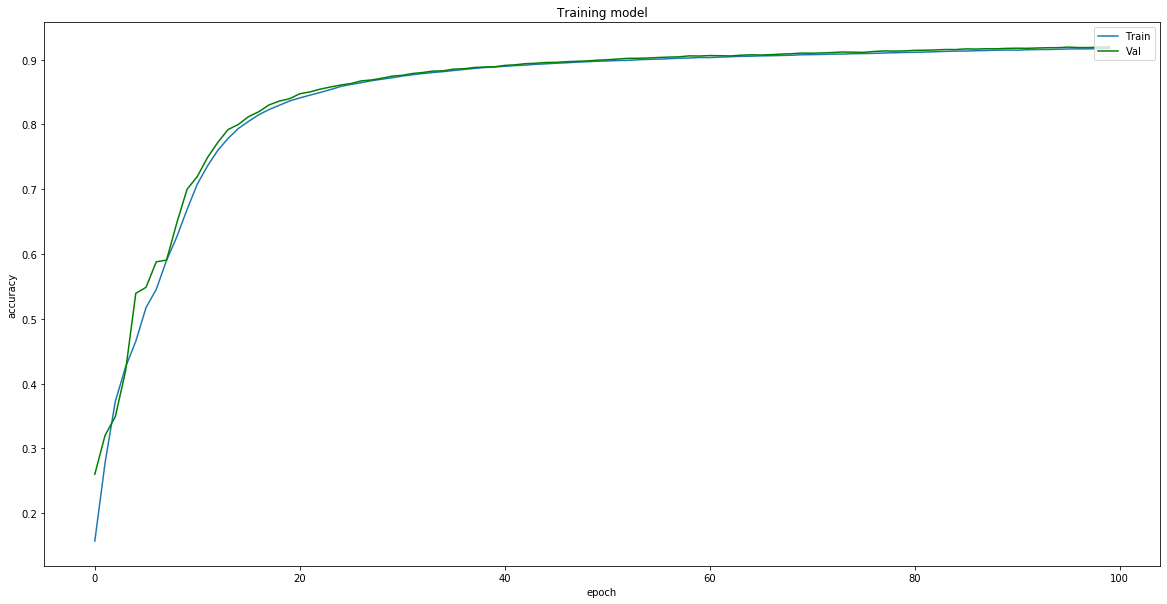

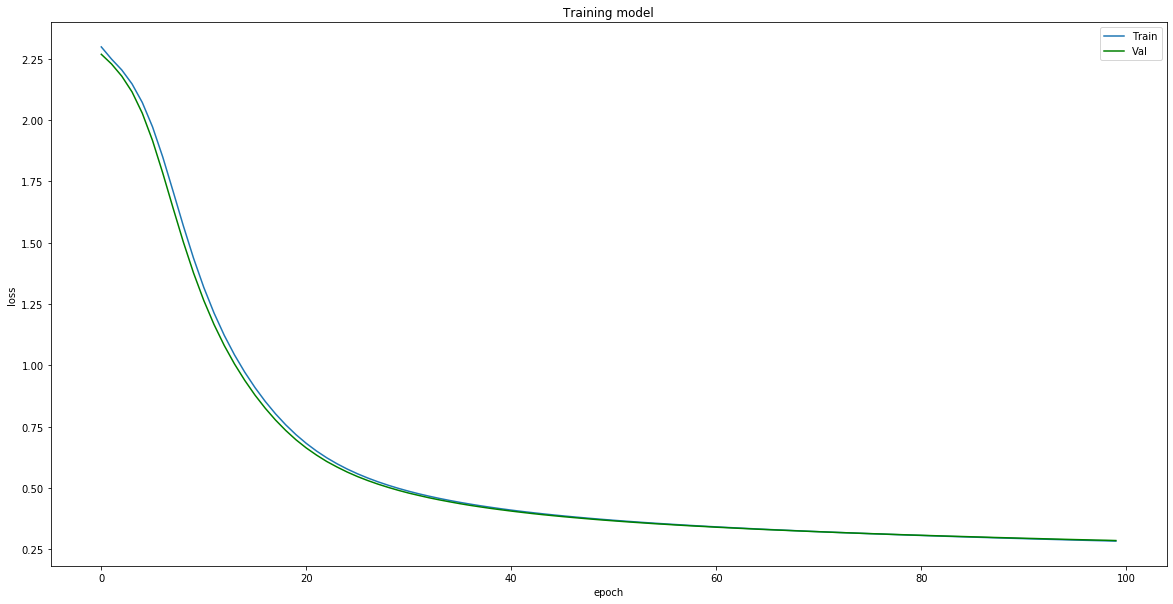

In [25]:
plt.figure(figsize=(20,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'],'g')
plt.title('Training model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'g')
plt.title('Training model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')

### 1.9 - Avalie o modelo nos dados de teste e verifique a acurácia e o erro:

In [27]:
evs = model.evaluate(x_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 0s 16us/step


In [26]:
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.90      0.86      0.88       892
           6       0.93      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.88      0.89       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Resposta : Após a observação e avaliação dos recultados constatei que o modelo apresentou 92% de acurácia e 96% no calculo de predição, obtendo a tendência esperada ao logno das épocas e não está gerando overfitting.